### Final Project 
#### 520H0374 - Le Dinh Khoi
#### 520H0120 - Vu Le Tan Phat

#### Excercise 2.1

In [114]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
data = pd.read_csv('ds_salaries.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Basic statistical analysis for numerical features
print("\nStatistical summary of numerical features:")
numerical_stats = data.describe()
print(numerical_stats)

First few rows of the dataset:
   work_year experience_level employment_type                 job_title  \
0       2023               SE              FT  Principal Data Scientist   
1       2023               MI              CT               ML Engineer   
2       2023               MI              CT               ML Engineer   
3       2023               SE              FT            Data Scientist   
4       2023               SE              FT            Data Scientist   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0   80000             EUR          85847                 ES           100   
1   30000             USD          30000                 US           100   
2   25500             USD          25500                 US           100   
3  175000             USD         175000                 CA           100   
4  120000             USD         120000                 CA           100   

  company_location company_size  
0               ES   

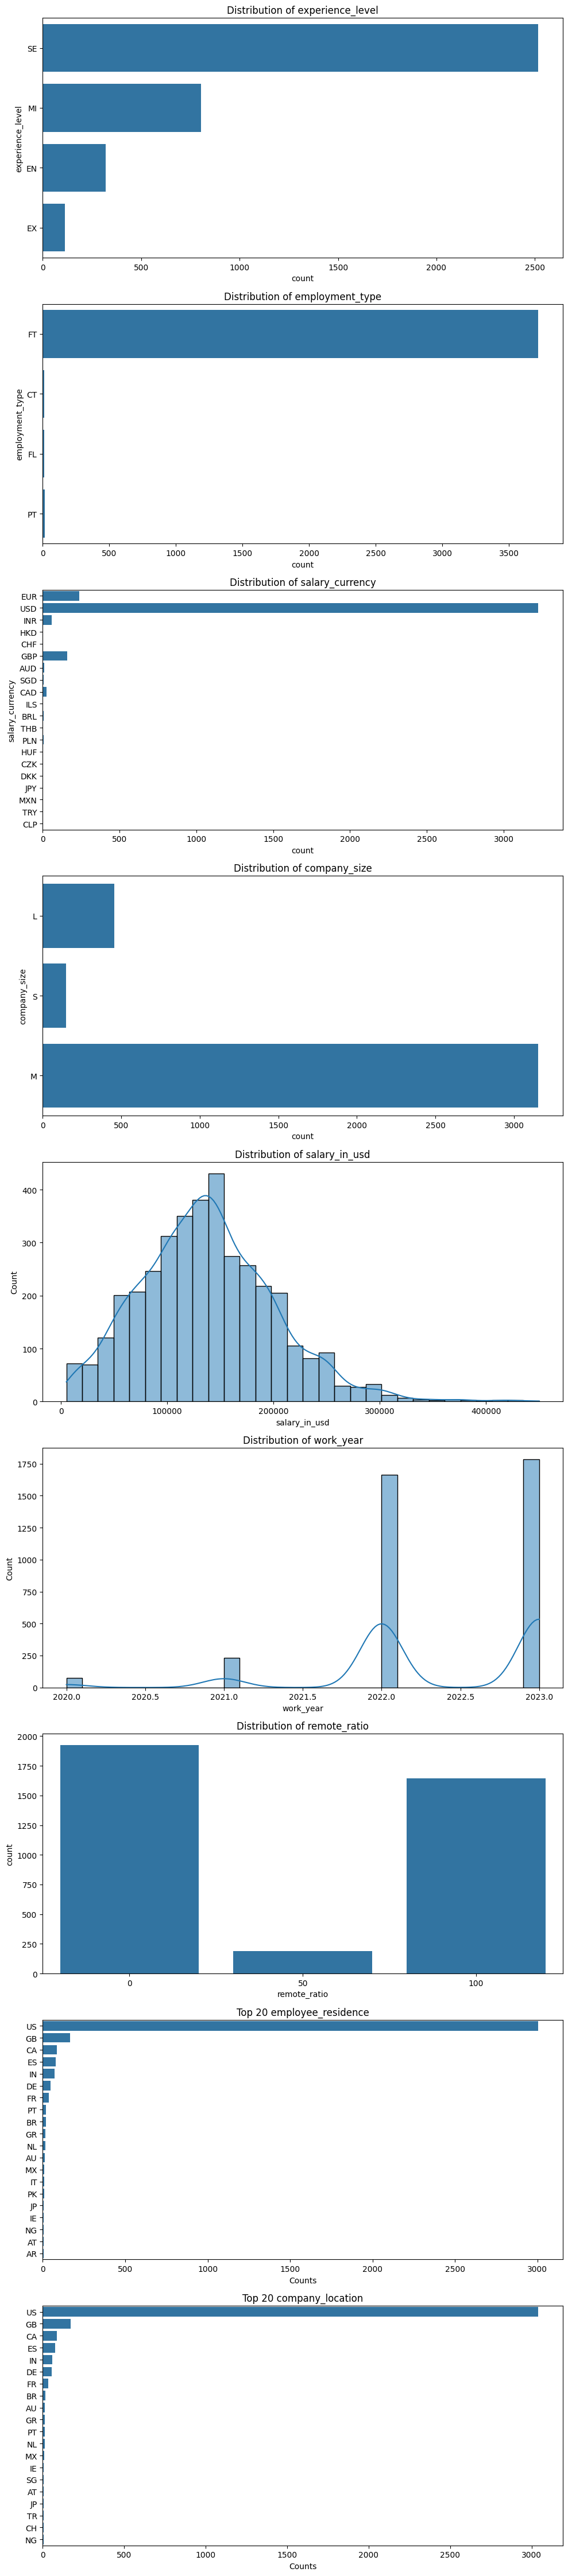

In [115]:
# Define the function to plot the top N categories in a horizontal bar chart
def plot_top_n_categories(data, category, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    top_categories = data[category].value_counts().head(top_n)
    sns.barplot(y=top_categories.index, x=top_categories, ax=ax)
    ax.set_title(f'Top {top_n} {category}')
    ax.set_xlabel('Counts')
    ax.set_ylabel('')

# Define the list of categorical and numerical features for plotting
categorical_features = ['experience_level', 'employment_type', 'salary_currency', 'company_size']
numerical_features = ['salary_in_usd', 'work_year', 'remote_ratio']

# Recalculating the number of plots needed
num_categorical_plots = len(categorical_features)
num_numerical_plots = len(numerical_features)
num_additional_plots = 2  # For 'employee_residence' and 'company_location'
total_plots = num_categorical_plots + num_numerical_plots + num_additional_plots

# Adjusting figure size to accommodate all subplots
fig, axs = plt.subplots(total_plots, 1, figsize=(10, 5 * total_plots))

# Plotting count plots for categorical features
for i, feature in enumerate(categorical_features):
    sns.countplot(y=data[feature], ax=axs[i])
    axs[i].set_title(f'Distribution of {feature}')

# Plotting histograms for numerical features
for i, feature in enumerate(numerical_features):
    ax_index = i + num_categorical_plots
    if feature != 'remote_ratio':
        sns.histplot(data[feature], bins=30, kde=True, ax=axs[ax_index])
        axs[ax_index].set_title(f'Distribution of {feature}')
    else:
        sns.countplot(x=data[feature], ax=axs[ax_index])
        axs[ax_index].set_title(f'Distribution of {feature}')

# Plotting top N categories for 'employee_residence' and 'company_location'
plot_top_n_categories(data, 'employee_residence', top_n=20, ax=axs[-2])
plot_top_n_categories(data, 'company_location', top_n=20, ax=axs[-1])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### Excersice 2.2

In [116]:
# Importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Checking for missing values
print(data.isnull().sum(), '\n')

print(data.dtypes)

def categorise_data(data):
  salary = []
  for i in range(len(data)):
    if data['salary_in_usd'].iloc[i] >= 100000:
      salary.append('>=100K')
    else:
      salary.append('<100K')
  data['salary_in_usd'] = salary

categorise_data(data)

print('\n', data['salary_in_usd'].value_counts())

# Preprocessing data
types = data.dtypes
names = data.columns

le = LabelEncoder()

for i in range(len(types)):
  if types.iloc[i] == 'object':
    le.fit_transform(data[names[i]])
    data[names[i]] = le.transform(data[names[i]])

print(data.dtypes)
data.head()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64 

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

 salary_in_usd
>=100K    2764
<100K      991
Name: count, dtype: int64
work_year             int64
experience_level      int32
employment_type       int32
job_title             int32
salary                int64
salary_currency       int32
salary_in_usd         int32
employee_residence    int32
remote_ratio          int64
company_location      int32
company_size          int32
dtype: o

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,3,2,84,80000,7,0,26,100,25,0
1,2023,2,0,66,30000,19,0,75,100,70,2
2,2023,2,0,66,25500,19,0,75,100,70,2
3,2023,3,2,47,175000,19,1,11,100,12,1
4,2023,3,2,47,120000,19,1,11,100,12,1


In [117]:
# Splitting data into target and features
X = data.drop(['salary_in_usd', 'salary', 'salary_currency'], axis=1)
y = data['salary_in_usd']

print(X.shape)
print(y.shape)

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3755, 8)
(3755,)
(3004, 8)
(751, 8)
(3004,)
(751,)


In [118]:
# Applying Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_regression_predictions = linear_regression.predict(X_test)

# Applying Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
naive_bayes_predictions = naive_bayes.predict(X_test)

# Applying Random Forests
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_predictions = random_forest.predict(X_test)

# Applying AdaBoost
gradient_boosting = AdaBoostClassifier()
gradient_boosting.fit(X_train, y_train)
gradient_boosting_predictions = gradient_boosting.predict(X_test)

# Applying Decision Trees
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_predictions = decision_tree.predict(X_test)

# Applying k-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

# Evaluating the performance of each algorithm
linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
ada_boost_accuracy = accuracy_score(y_test, gradient_boosting_predictions)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Printing the accuracies
print("Linear Regression MSE:", linear_regression_mse)
print("Naive Bayes Accuracy:", naive_bayes_accuracy)
print("Random Forests Accuracy:", random_forest_accuracy)
print("AdaBoost Accuracy:", ada_boost_accuracy)
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("k-Nearest Neighbors Accuracy:", knn_accuracy)


Linear Regression MSE: 0.13804893154249998
Naive Bayes Accuracy: 0.8175765645805593
Random Forests Accuracy: 0.8402130492676432
AdaBoost Accuracy: 0.8388814913448736
Decision Tree Accuracy: 0.8282290279627164
k-Nearest Neighbors Accuracy: 0.829560585885486


#### Excercise 2.3

In [119]:
# Step 1: Import necessary libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Handling categorical and numerical variables
categorical_features = ['experience_level', 'employment_type', 'company_size']
numerical_features = ['remote_ratio']

# Create transformers for categorical and numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Apply transformations
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Step 3: Define the Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Step 5: Evaluate the Model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Step 6: Make Predictions (Optional)
predictions = model.predict(X_test)

Epoch 1/100
76/76 [==============================] - 1s 4ms/step - loss: 0.2222 - val_loss: 0.1691
Epoch 2/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1507 - val_loss: 0.1669
Epoch 3/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1499 - val_loss: 0.1663
Epoch 4/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1496 - val_loss: 0.1699
Epoch 5/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1489 - val_loss: 0.1689
Epoch 6/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1532 - val_loss: 0.1692
Epoch 7/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1475 - val_loss: 0.1698
Epoch 8/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1471 - val_loss: 0.1682
Epoch 9/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1473 - val_loss: 0.1698
Epoch 10/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1463 - val_loss: 0.1706
Epoch 11/

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

categorical_features = ['experience_level', 'employment_type', 'company_size']
numerical_features = ['remote_ratio']

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=0)

# Step 4: Reshape Data for RNN
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Step 5: Build the RNN Model
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Step 6: Train the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Step 7: Evaluate the Model
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Step 8: Make Predictions (Optional)
predictions = model.predict(X_test)

Epoch 1/100
76/76 [==============================] - 1s 6ms/step - loss: 0.2341 - val_loss: 0.1735
Epoch 2/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1528 - val_loss: 0.1705
Epoch 3/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1500 - val_loss: 0.1699
Epoch 4/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1490 - val_loss: 0.1707
Epoch 5/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1492 - val_loss: 0.1693
Epoch 6/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1483 - val_loss: 0.1706
Epoch 7/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1479 - val_loss: 0.1692
Epoch 8/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1475 - val_loss: 0.1701
Epoch 9/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1480 - val_loss: 0.1696
Epoch 10/100
76/76 [==============================] - 0s 3ms/step - loss: 0.1468 - val_loss: 0.1675
Epoch 11/

#### Exercise 2.4
##### Tránh Overfitting cho Linear Regression
##### Early Stopping

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()

best_val_error = float('inf')
best_model = None
for epoch in range(100):
    model.fit(X_train, y_train)
    val_error = mean_squared_error(y_test, model.predict(X_test))
    if val_error < best_val_error:
        best_val_error = val_error
        best_model = model
    else:
        break

print("Best Validation MSE:", best_val_error)

Best Validation MSE: 0.11417141318243924


##### Tránh Overfitting cho Naive Bayes Gaussian
##### Cross-Validation

In [122]:
from sklearn.model_selection import cross_val_score

model = GaussianNB(var_smoothing=0.9)
score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

print("Accuracy:", score.mean())

Accuracy: 0.7323566278424847


##### Tránh Overfitting cho Random Forest
##### Giảm số lượng cây, kiểm soát độ sâu cây

In [123]:
model = RandomForestClassifier(n_estimators=100, max_depth=5)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.8695073235685752


##### Tránh Overfitting cho AdaBoost
##### Giảm số lượng cây, tốc độ học

In [124]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.5)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.8695073235685752


##### Tránh Overfitting cho Decision Tree
##### Giới hạn độ sâu, max features hoặc sử dụng Random Forest

In [125]:
model = DecisionTreeClassifier(max_depth=5, max_features='sqrt')

model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.848202396804261


##### Tránh Overfitting cho KNN
##### Điều chỉnh số lượng neighbors, weight

In [126]:
model = KNeighborsClassifier(n_neighbors=5, weights='distance')

model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.8362183754993342


##### Tránh Overfitting cho Feed Forward Neural Network
##### Regularization

In [127]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numerical_features = ['work_year', 'remote_ratio', 'experience_level', 'employment_type', 'company_size', 'employee_residence', 'company_location', 'company_size']

numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
  transformers=[
    ('num', numerical_transformer, numerical_features),
  ])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

test_loss = model.evaluate(X_test, y_test)
predictions = model.predict(X_test)
mean_squared_error = mean_squared_error(y_test, predictions)
print(f'MSE: {mean_squared_error}, Test Loss: {test_loss}')

Epoch 1/100


76/76 [==============================] - 1s 4ms/step - loss: 0.3167 - val_loss: 0.2751
Epoch 2/100
76/76 [==============================] - 0s 2ms/step - loss: 0.2292 - val_loss: 0.2283
Epoch 3/100
76/76 [==============================] - 0s 2ms/step - loss: 0.2028 - val_loss: 0.2075
Epoch 4/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1804 - val_loss: 0.1889
Epoch 5/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1674 - val_loss: 0.1801
Epoch 6/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1566 - val_loss: 0.1707
Epoch 7/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1497 - val_loss: 0.1653
Epoch 8/100
76/76 [==============================] - 0s 3ms/step - loss: 0.1425 - val_loss: 0.1579
Epoch 9/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1415 - val_loss: 0.1558
Epoch 10/100
76/76 [==============================] - 0s 3ms/step - loss: 0.1375 - val_loss: 0.1556
Epoch 11/100
76/76 [=

##### Tránh Overfitting cho Recurrent Neural Network
##### Dropout

In [153]:
from tensorflow.keras.layers import Dropout

numerical_features = ['work_year', 'remote_ratio', 'experience_level', 'employment_type', 'company_size', 'employee_residence', 'company_location', 'company_size']

numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
  transformers=[
    ('num', numerical_transformer, numerical_features),
  ])

X_processed = preprocessor.fit_transform(X)

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=0)

# Step 4: Reshape Data for RNN
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

model = Sequential([
  SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
  Dropout(0.2),  # Add dropout layer with a dropout rate of 0.2
  Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

test_loss = model.evaluate(X_test, y_test)
predictions = model.predict(X_test)
print(f'Test Loss: {test_loss}')

Epoch 1/100
76/76 [==============================] - 1s 5ms/step - loss: 0.3156 - val_loss: 0.1761
Epoch 2/100
76/76 [==============================] - 0s 2ms/step - loss: 0.2089 - val_loss: 0.1553
Epoch 3/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1788 - val_loss: 0.1465
Epoch 4/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1726 - val_loss: 0.1425
Epoch 5/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1679 - val_loss: 0.1465
Epoch 6/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1622 - val_loss: 0.1421
Epoch 7/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1487 - val_loss: 0.1404
Epoch 8/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1484 - val_loss: 0.1433
Epoch 9/100
76/76 [==============================] - 0s 2ms/step - loss: 0.1522 - val_loss: 0.1414
Epoch 10/100
76/76 [==============================] - 0s 3ms/step - loss: 0.1520 - val_loss: 0.1431
Epoch 11/